In [115]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [116]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [117]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [118]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [119]:
# reflect an existing database into a new model

Base = automap_base()


# reflect the tables

Base.prepare(engine, reflect = True)

In [120]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [121]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [122]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [162]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
# print(calc_temps('2012-02-28', '2012-03-05'))

In [163]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2011-01-01', '2011-12-31'))

[(56.0, 72.67471642883278, 86.0)]


In [125]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
xvalues = calc_temps('2011-01-01', '2011-12-31')
avg_temp_df = pd.DataFrame(xvalues)
avg_temp_df.columns = ['min','avg','max']
avg_temp_df
avg_temp = round(avg_temp_df['avg'],2)
avg_temp
avg_temp_df['avg'] = avg_temp
avg_temp_df



,min,avg,max
0,56.0,72.67,86.0


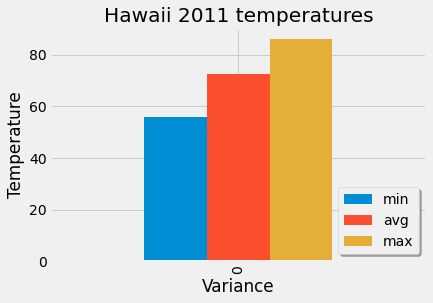

In [126]:
#avg_temp_df.plot()
avg_temp_df.plot(kind='bar')

plt.xlabel('Variance')
plt.ylabel('Temperature')
plt.title('Hawaii 2011 temperatures')
plt.legend(loc='lower right', shadow=True)


plt.show()

### Daily Rainfall Average

In [212]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, 
#longitude, and elevation
def calc_total_rain(start_date, end_date):

   return session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,\
              func.sum(Measurement.tobs)).group_by(Measurement.station).\
            join(Station, Measurement.station == Station.station).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()\
            




In [213]:
# Find the total rain by station between two dates
total_rain = calc_total_rain('2011-01-01', '2011-12-31')
#print(total_rain)
#my_val


In [218]:
total_rain_df = pd.DataFrame(total_rain)
total_rain_df.columns=['Station','StationName','Latitude','Longitude','Elevation','TotalRain']
total_rain_df = total_rain_df.sort_values(by=['TotalRain'], ascending=False)
total_rain_df

,Station,StationName,Latitude,Longitude,Elevation,TotalRain
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,26912.0
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,25933.0
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,25731.0
7,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,25626.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,25337.0
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,24584.0
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,21104.0
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,15130.0
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,8263.0


In [107]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))
xvalues = calc_temps('2011-01-01', '2011-12-31')

[(62.0, 69.57142857142857, 74.0)]


In [108]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [109]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [110]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [111]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session

In [112]:
session.close()